In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [61]:
df = pd.read_csv("data.csv")

In [62]:
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [64]:
df.describe()

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.520400,4.539594,2.478734,2.011984,2.998086,1.564514,7.016492,6.979588,74.535600,251.450400,0.498200,0.501400,5.507400,29.431616,45.615324,37.267716,18.803752
std,1443.520003,2.870406,1.821665,1.177990,0.983906,1.467949,1.110807,1.163692,2.486214,42.932293,143.842712,0.500047,0.500048,2.869145,9.962902,14.246591,16.849397,12.130840
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,18.000000,3.250000,1.660000,1.320000,1.990000,0.670000,6.237500,5.280000,37.000000,129.000000,0.000000,0.000000,3.000000,22.567500,35.727500,25.290000,9.337500
50%,2500.500000,20.000000,4.530000,2.480000,2.010000,2.980000,1.490000,7.010000,6.950000,75.000000,252.000000,0.000000,1.000000,5.000000,29.430000,45.690000,36.860000,18.010000
75%,3750.250000,23.000000,5.760000,3.290000,2.690000,4.030000,2.340000,7.810000,8.710000,112.000000,376.000000,1.000000,1.000000,8.000000,36.242500,55.352500,49.142500,27.400000
max,5000.000000,25.000000,11.840000,7.410000,6.000000,8.280000,5.640000,10.000000,15.300000,149.000000,499.000000,1.000000,1.000000,10.000000,63.480000,97.580000,98.020000,64.090000


In [65]:
for i in df.select_dtypes(include=['object']).columns:
    print(i)
    print(df[i].unique())


gender
['Other' 'Male' 'Female']
academic_level
['High School' 'Undergraduate' 'Postgraduate']
internet_quality
['Good' 'Poor' 'Average']


internet_quality
Good       1722
Poor       1640
Average    1638
Name: count, dtype: int64


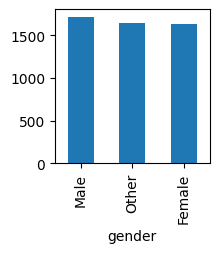

internet_quality
Good       1722
Poor       1640
Average    1638
Name: count, dtype: int64


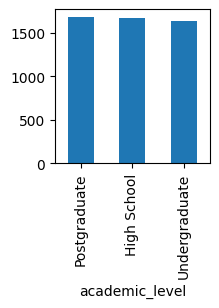

internet_quality
Good       1722
Poor       1640
Average    1638
Name: count, dtype: int64


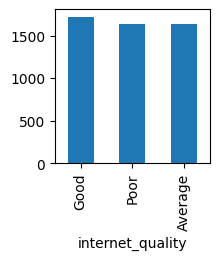

In [66]:
objcolumns = df.select_dtypes(include=['object']).columns
plt.rcParams['figure.figsize'] = (2,2)
for col in objcolumns:
    df[col].value_counts().plot(kind='bar')
    print(df[i].value_counts())
    plt.show()

In [67]:
int_map = {'Good':1,  'Poor':0, 'Average':0.5}
acad_map = {'High School':0, 'Undergraduate':1, 'Postgraduate':2}

In [68]:
df['academic_level'] = df['academic_level'].map(acad_map)
df['internet_quality'] = df['internet_quality'].map(int_map)

In [69]:
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,0,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,1.0,10,43.05,31.77,73.65,50.16
1,2,18,Other,0,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,1.0,3,15.92,37.00,13.70,1.00
2,3,22,Male,0,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,1.0,8,27.39,34.37,45.15,18.30
3,4,17,Other,0,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,0.0,3,22.31,77.31,20.92,9.37
4,5,19,Other,0,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,1.0,8,38.11,39.53,59.23,27.81


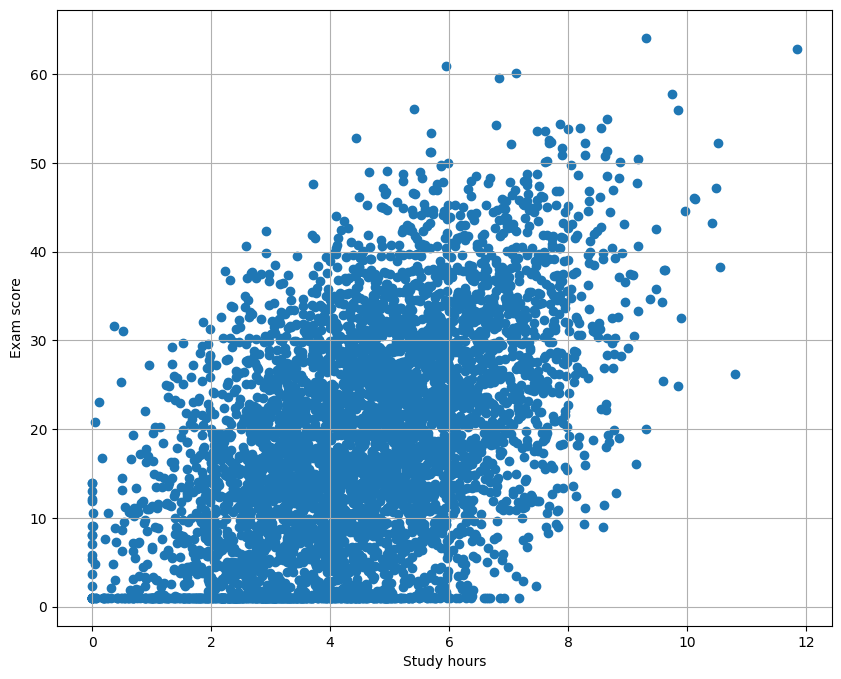

In [70]:
plt.figure(figsize=(10,8))
plt.scatter(df['study_hours'],df['exam_score'])
plt.xlabel('Study hours')
plt.ylabel('Exam score')
plt.grid(True)
plt.show()

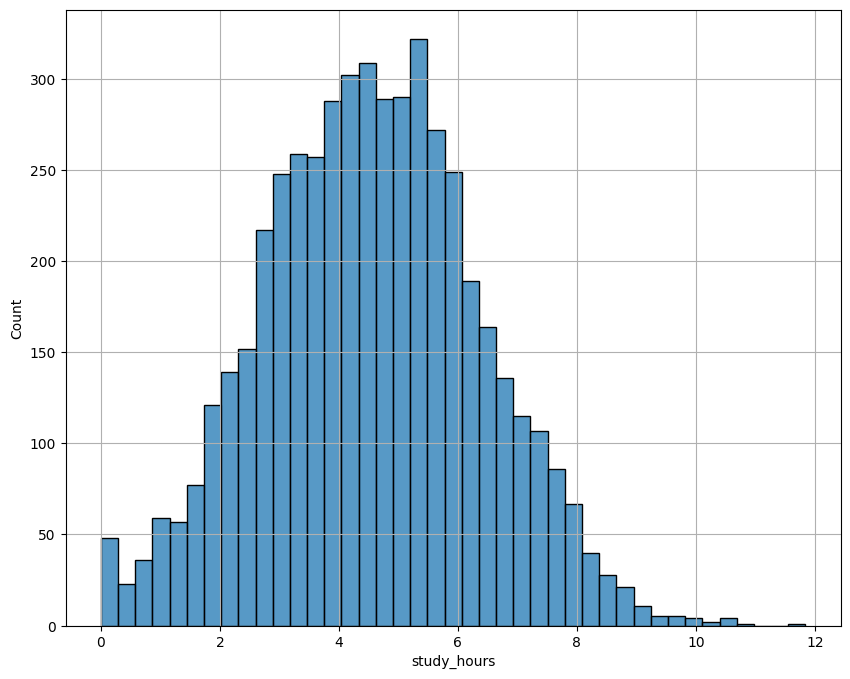

In [71]:
plt.figure(figsize=(10,8))
sns.histplot(df['study_hours'])
plt.grid(True)

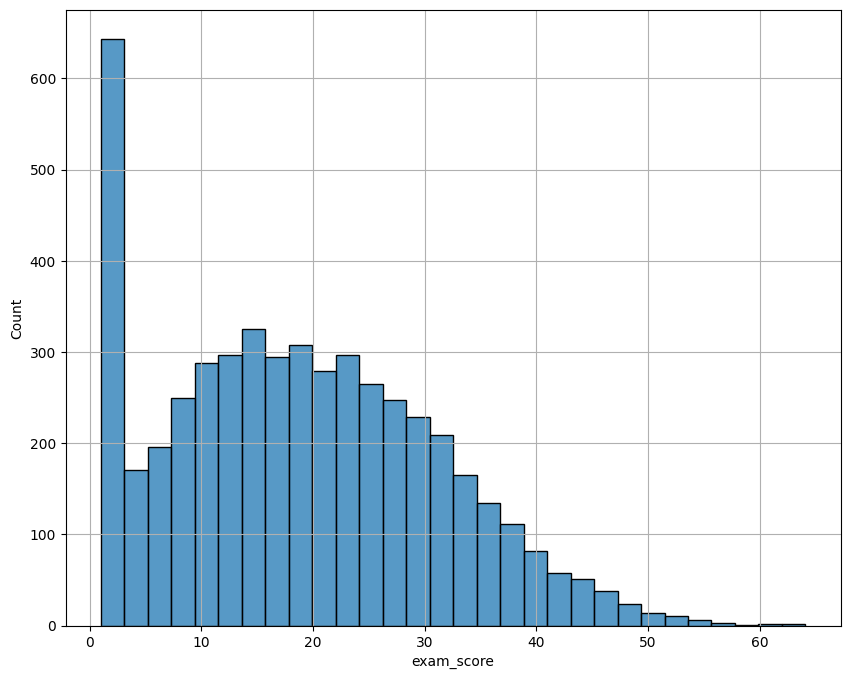

In [72]:
plt.figure(figsize=(10,8))
sns.histplot(df['exam_score'])
plt.grid(True)

<Axes: >

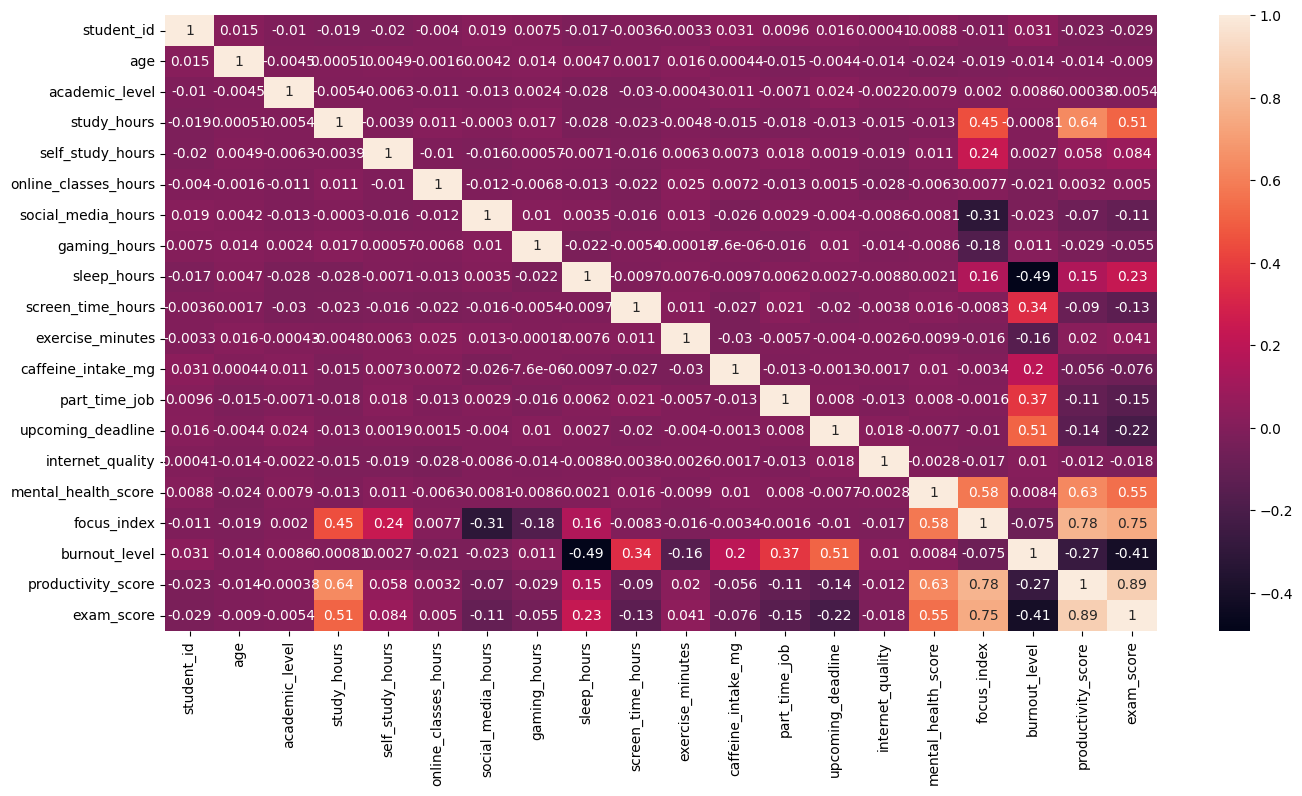

In [73]:
plt.figure(figsize=(16, 8))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix,annot=True)

In [74]:
df = pd.get_dummies(df, columns=['gender'])

In [75]:
X = df.drop(columns=['exam_score'])
y = df['exam_score']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [77]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)


4.901451632750973
0.8481478918303686


In [78]:
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

4.839636273869143
0.8519539484125052


In [79]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())

   student_id       age  academic_level  study_hours  self_study_hours  \
0   -0.193915  0.514756        1.214596     0.387498          1.039668   
1   -0.548752 -0.527964       -0.001216     1.764495         -0.750003   
2   -0.028325 -0.527964        1.214596     1.168889          0.507832   
3    1.304051  1.557477       -0.001216     0.289141          0.651343   
4    0.679956 -0.180391        1.214596    -0.650715         -0.614934   

   online_classes_hours  social_media_hours  gaming_hours  sleep_hours  \
0              3.172704            0.841712     -0.171584     0.338390   
1             -0.445492            0.280061     -1.171429    -0.574629   
2              1.832258            0.733442      3.188257    -0.014759   
3              0.774012            2.391328      0.125668    -0.264547   
4              0.018121           -1.039481     -0.874178     0.467590   

   screen_time_hours  ...  part_time_job  upcoming_deadline  internet_quality  \
0          -0.999678  ...    

In [81]:
models = [Lr, model]
for i in models:
    i.fit(X_train_scaled, y_train)
    y_pred = i.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    print(i)
    print(rmse)
    print(r2)

LinearRegression()
4.897560744566751
0.8483888837268383
RandomForestRegressor(random_state=40)
4.841187531727107
0.8518590262348197
